# Task-4: Decision Tree Classifier with Iris Dataset

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

### Data loading

In [108]:
iris = pd.read_csv('Iris.csv',index_col='Id')
iris
X,y = iris.iloc[:,:4],iris.iloc[:,4]
feature_names = iris.columns[:4].tolist()
feature_names

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### K-fold cross validation for Hyper parameter tunning(max_depth)

In [109]:
kf = KFold(n_splits=4,shuffle=True)
scores = {}
i = 0
for train_index,test_index in kf.split(X,y):
    scores[i+1] = []
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    for max_depth in range(2,15):
        clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train,y_train)
        scores[i+1].append((clf.score(X_train,y_train),clf.score(X_test,y_test)))
    i+=1    

### Visualization of all Train-Test folds' Accuracies varying with max_depth

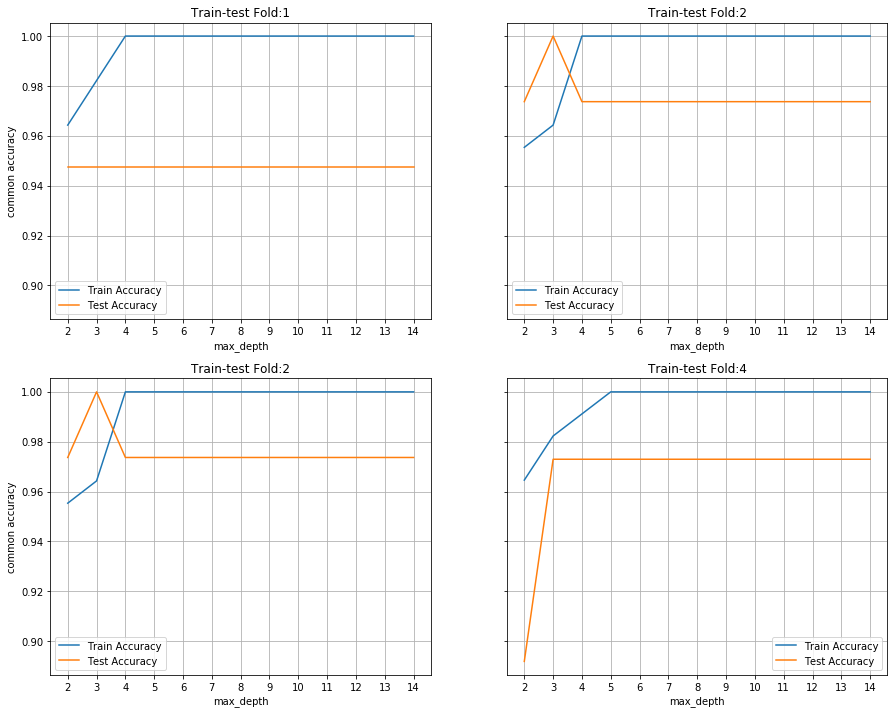

In [117]:
fig,axes = plt.subplots(2,2,figsize = (15,12),sharey=True)

for i in range(2):
    axes[i][0].set_ylabel("common accuracy")
    for j in range(2):
        fold = (i+1)*(1+j)
        axes[i][j].set_title("Train-test Fold:"+str(fold))
        axes[i][j].plot(range(2,15),[score[0] for score in scores[fold]],label="Train Accuracy")
        axes[i][j].plot(range(2,15),[score[1] for score in scores[fold]],label="Test Accuracy")
        axes[i][j].set_xticks(range(2,15))
        #axes[i][j].set_yticks(np.arange(0,1.5,0.2))
        axes[i][j].set_xlabel("max_depth")
        
        axes[i][j].grid()
        axes[i][j].legend()
#plt.ylabel("accuracy")        

### Decision Tree Classifier with max_depth = 6

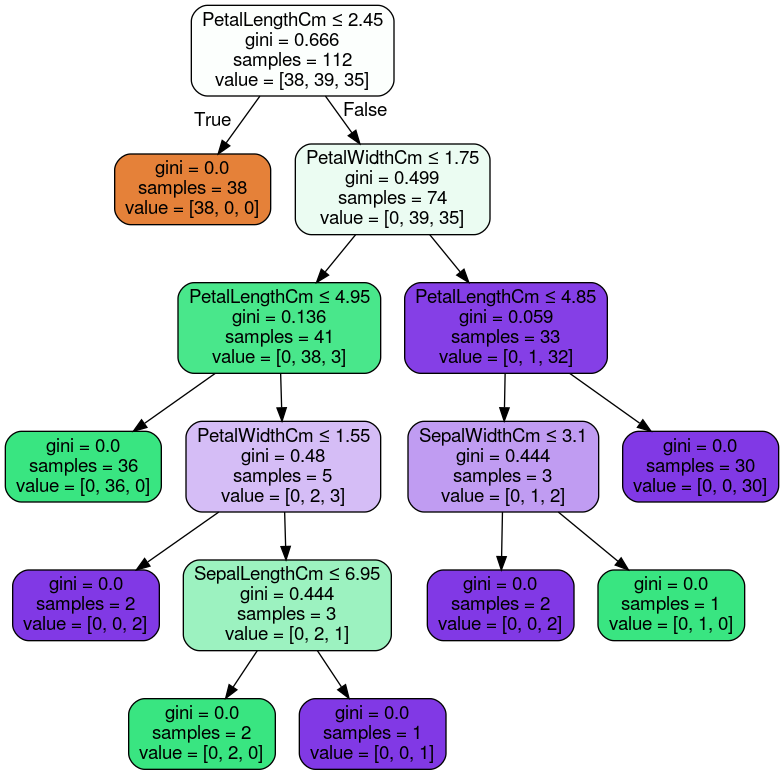

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf = DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature_names,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Scores & Prediction

In [119]:
print("Train score:",clf.score(X_train,y_train))
print("Test Score:",clf.score(X_test,y_test))
pred = [[2.3,4.2,2.8,3.3]]
print("Prediction of {} is {}".format(pred,clf.predict(pred)))

Train score: 1.0
Test Score: 0.9736842105263158
Prediction of [[2.3, 4.2, 2.8, 3.3]] is ['Iris-versicolor']
